# Logistic Regression
# To predict weather a person will have diabetes or not.

In [198]:
import pandas as pd
import numpy as np
import seaborn as sns

In [199]:
data=pd.read_csv('diabetes1.csv')

In [200]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# 1) Understanding Business case and Domain analysis.

# 2) Basic checks and EDA

In [203]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [204]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [205]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [206]:
#  no null values
# no categorical data
# 9 col and 768 records

In [207]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## EDA

In [209]:
# Univariate analysis

<Axes: xlabel='Pregnancies', ylabel='count'>

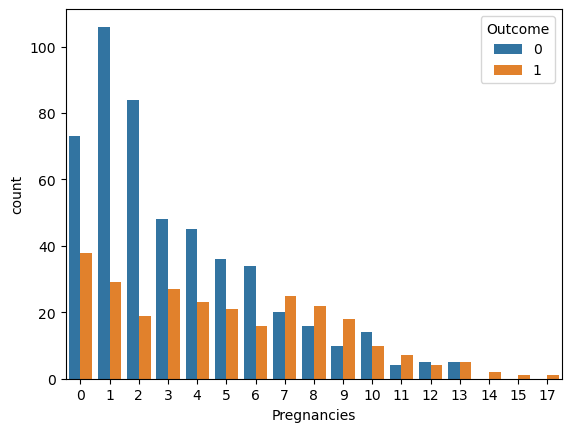

In [210]:
sns.countplot(x=data['Pregnancies'],hue=data['Outcome'])

<Axes: xlabel='Glucose', ylabel='Count'>

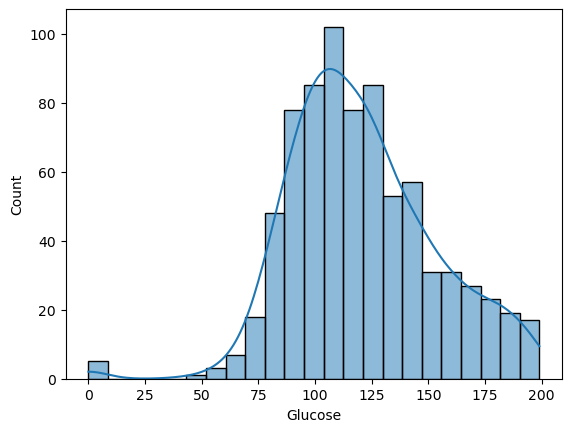

In [211]:
sns.histplot(x=data['Glucose'],kde=True)

# Create subplot

In [213]:
for i in data.columns:
    print(i)

Pregnancies
Glucose
BloodPressure
SkinThickness
Insulin
BMI
DiabetesPedigreeFunction
Age
Outcome


In [214]:
import matplotlib.pyplot as plt

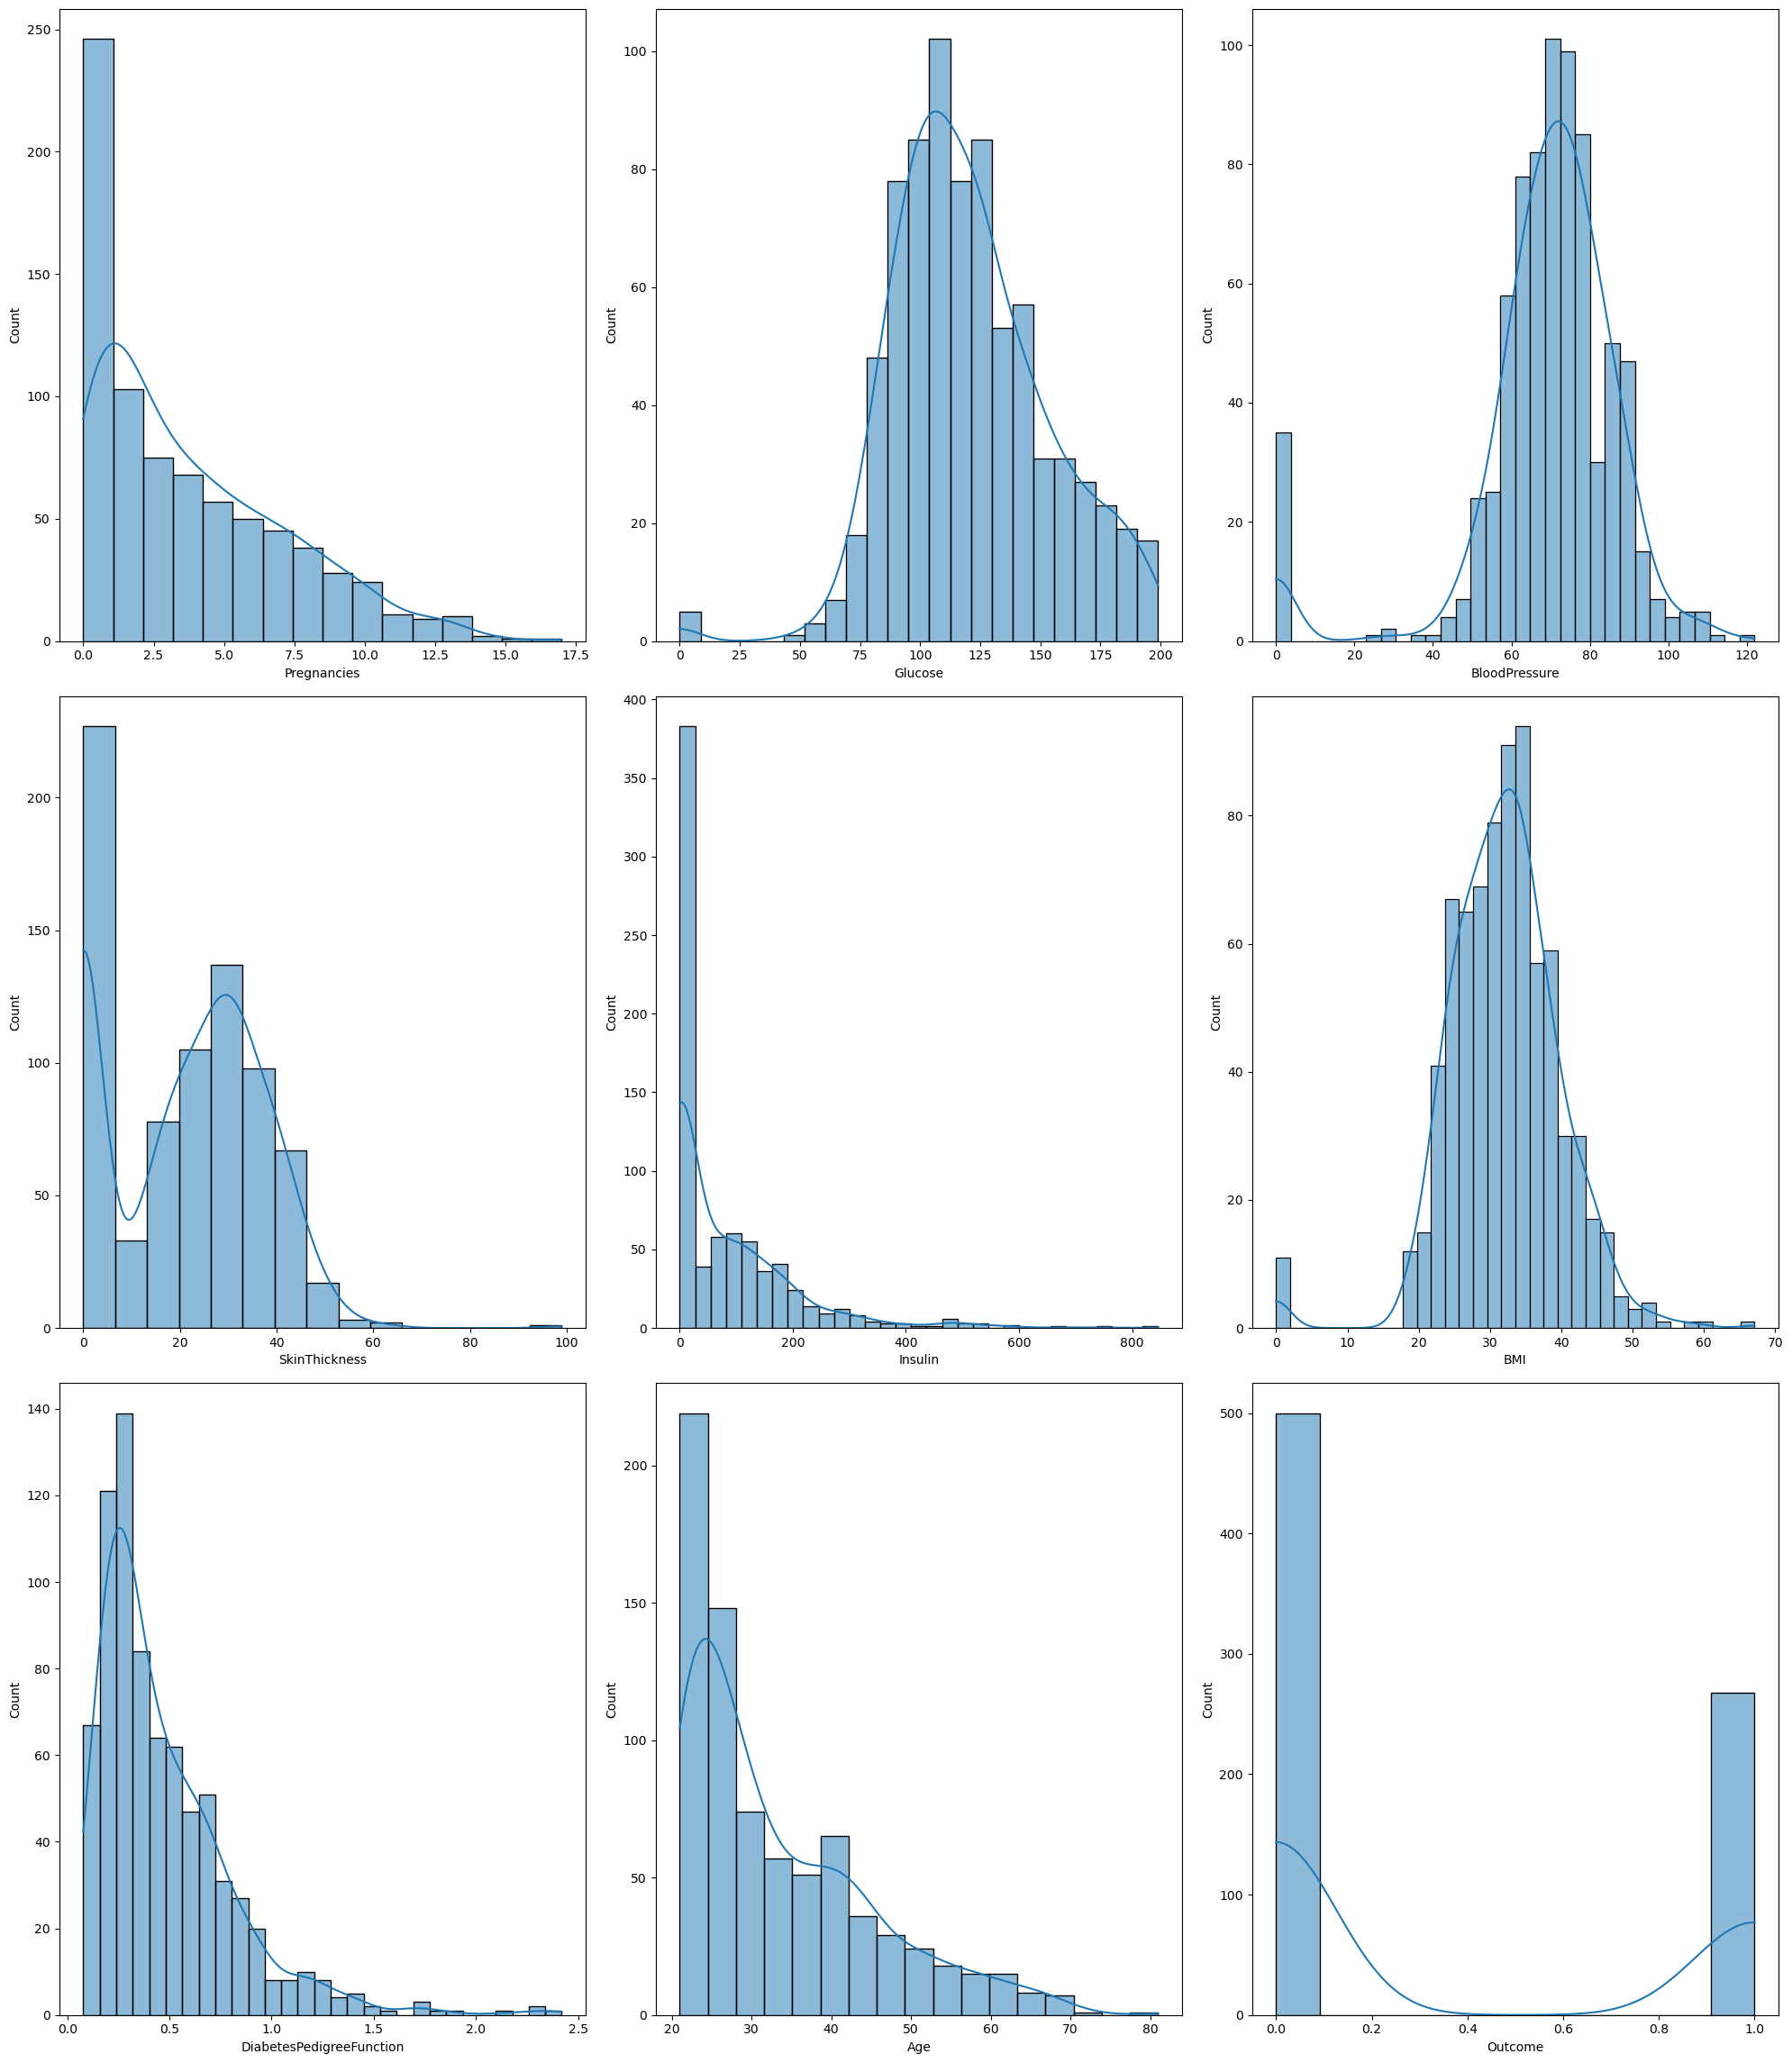

In [215]:
plt.figure(figsize=(20,23),facecolor='white')
plotnum=1
for i in data.columns:
    plt.subplot(3,3,plotnum)
    sns.histplot(x=data[i],kde=True)
    plotnum+=1
plt.tight_layout()

<Axes: xlabel='Pregnancies', ylabel='count'>

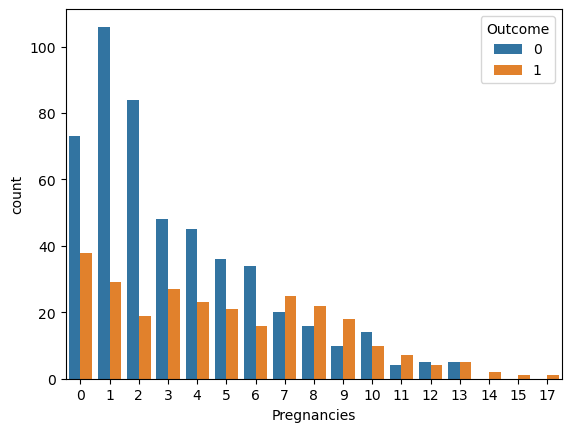

In [216]:
# Bivariate Analysis
sns.countplot(x='Pregnancies',hue='Outcome',data=data)

<Axes: xlabel='Glucose', ylabel='Age'>

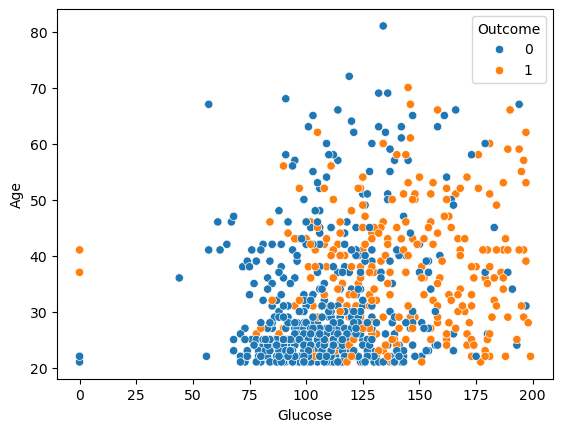

In [217]:
# Relation between Glocose and Age
sns.scatterplot(x='Glucose',y='Age',data=data,hue='Outcome')

<Axes: xlabel='Glucose', ylabel='BloodPressure'>

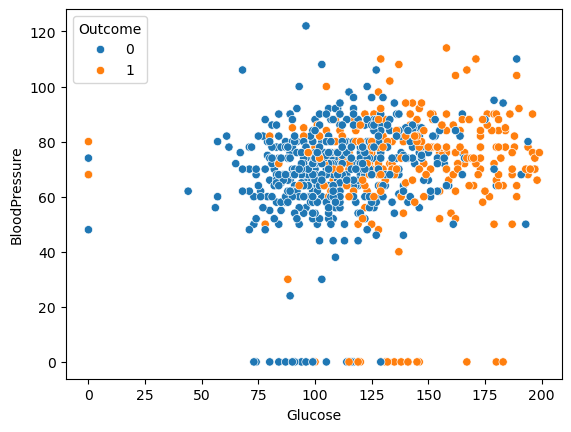

In [189]:
sns.scatterplot(x='Glucose',y='BloodPressure',data=data,hue='Outcome')

In [ ]:
sns.scatterplot(x='Glucose',y='BloodPressure',data=data,hue='Outcome')

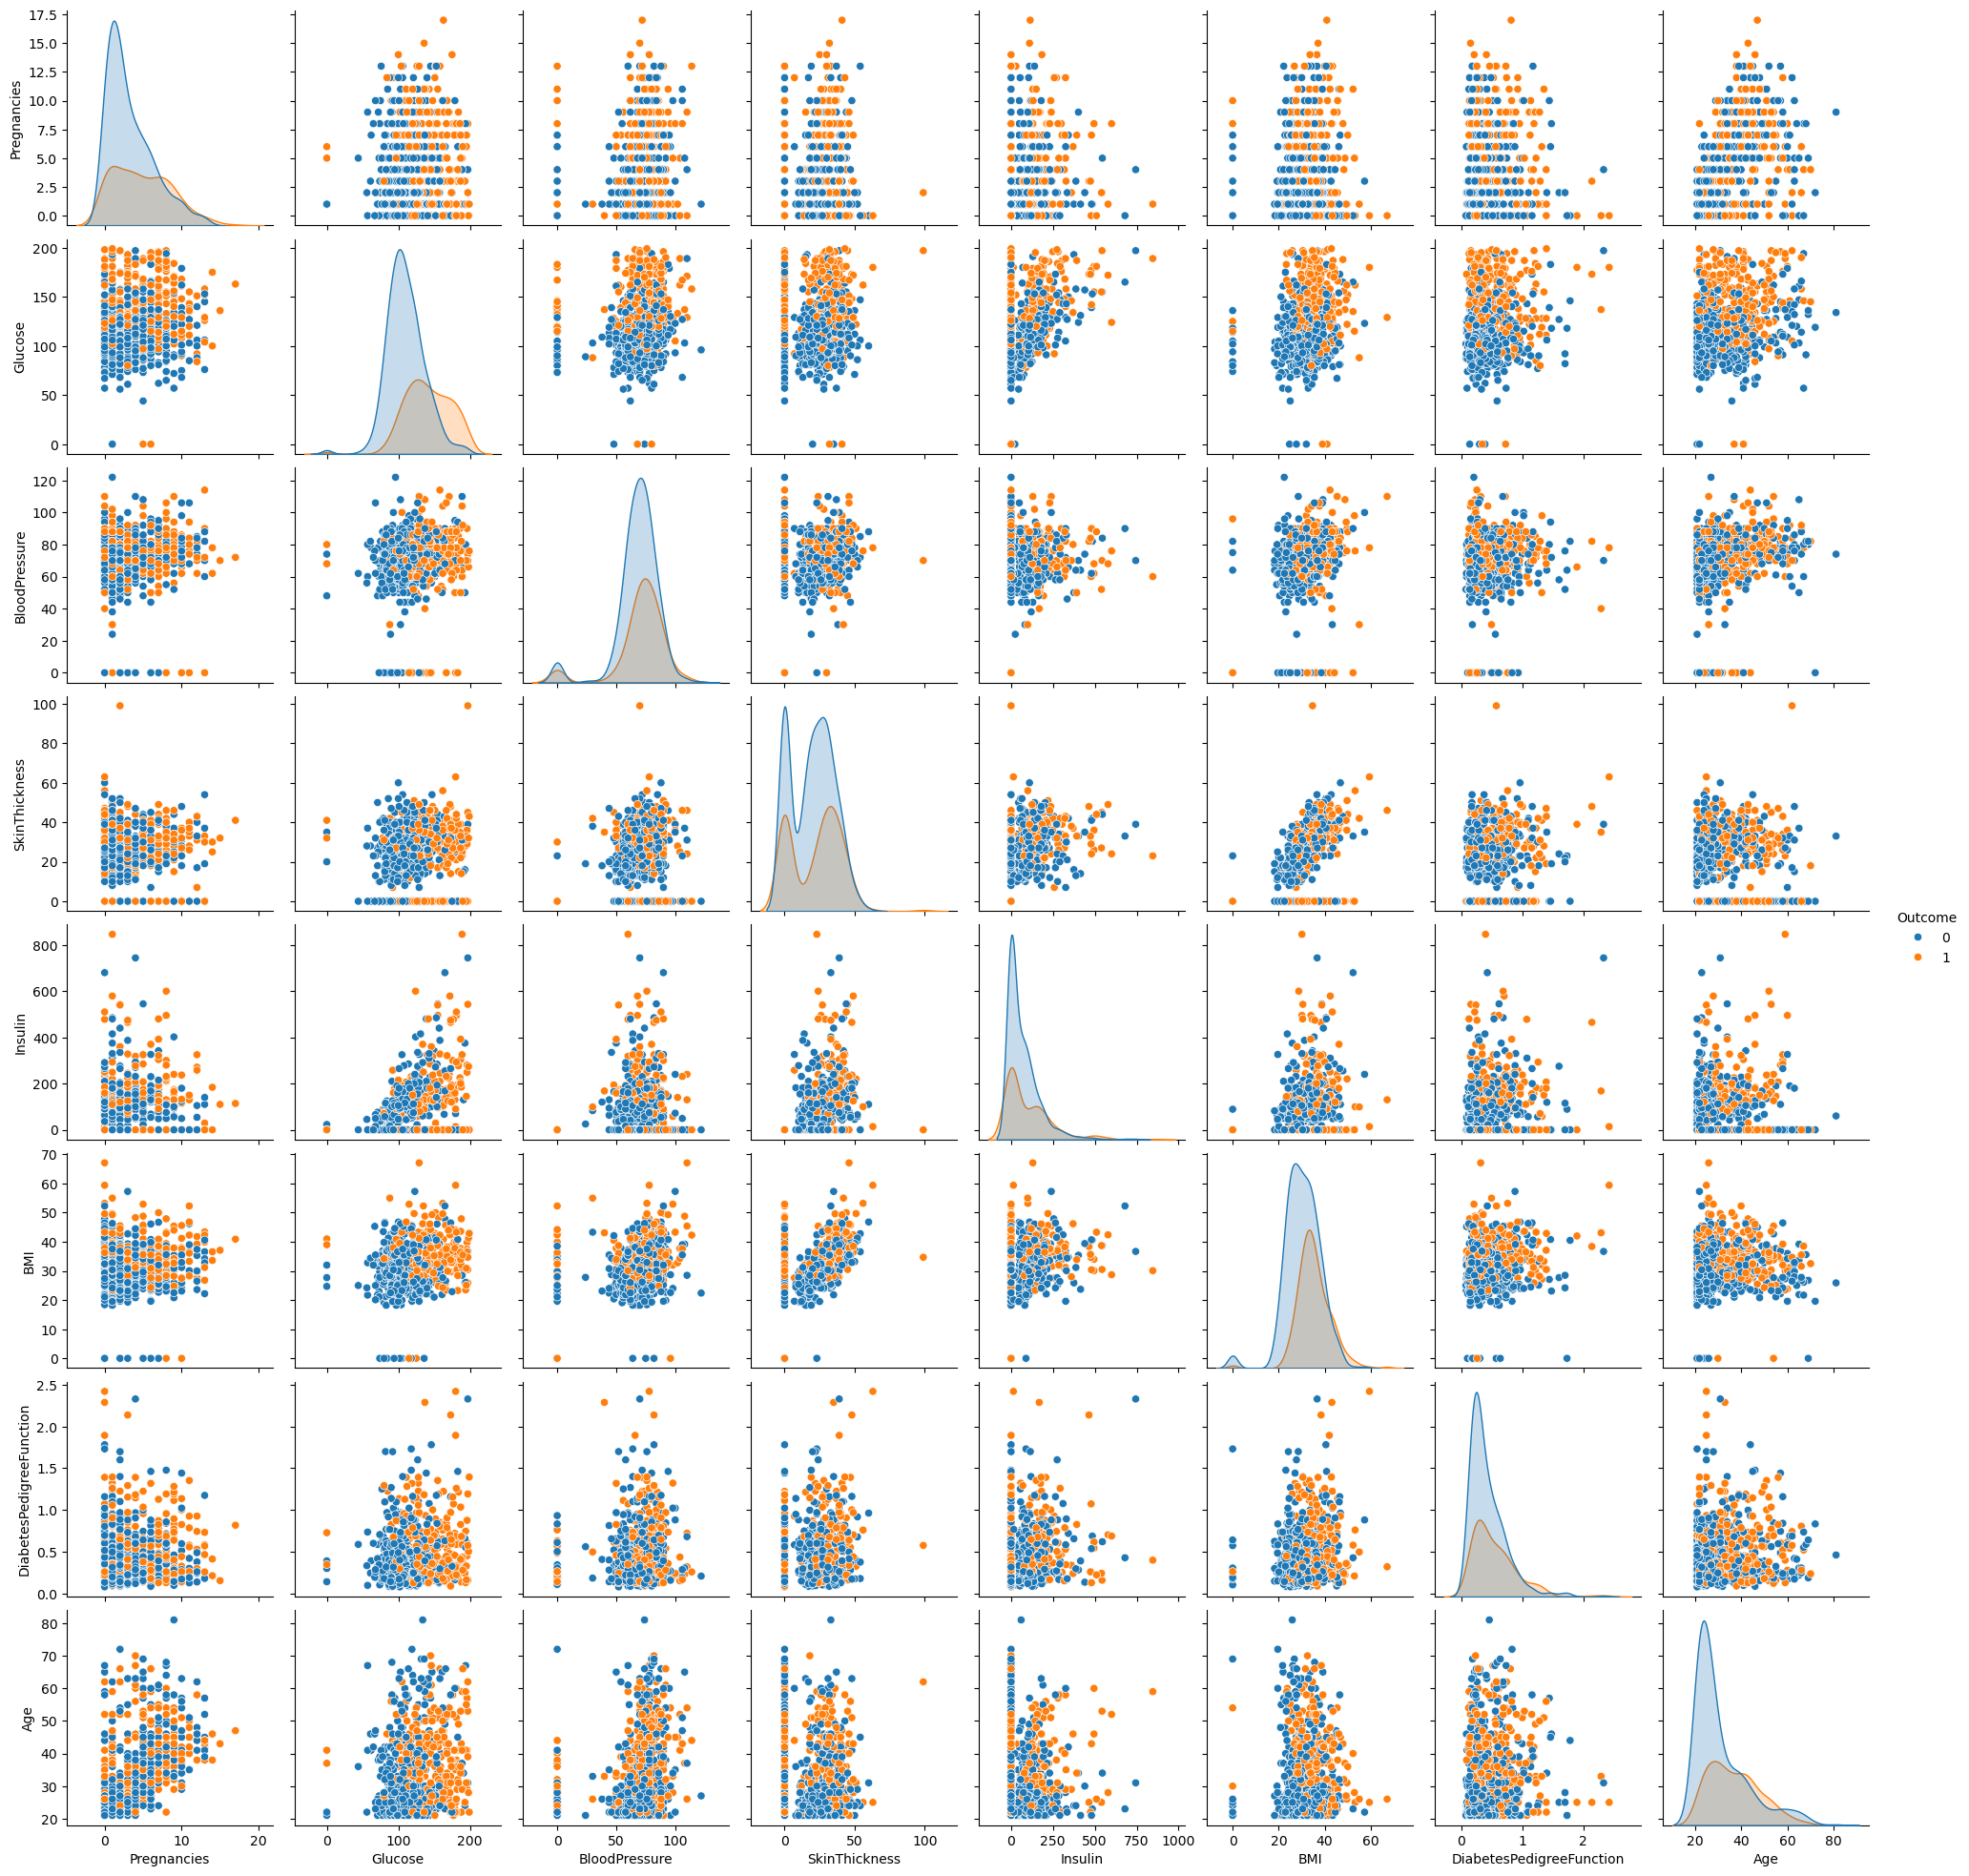

In [191]:
# Multivariate 
sns.pairplot(data,hue='Outcome')

<Axes: xlabel='BloodPressure', ylabel='Count'>

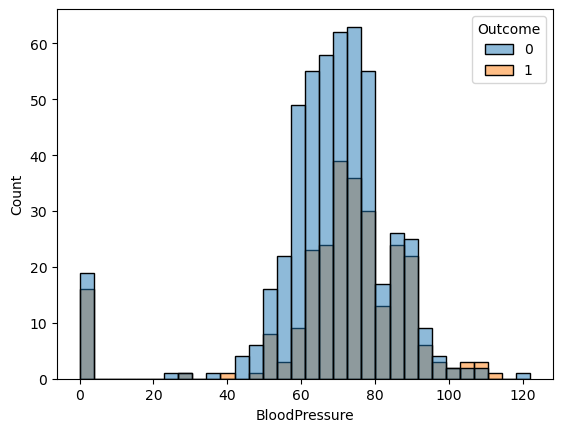

In [234]:
sns.histplot(x=data['BloodPressure'],hue=data['Outcome'])

<Axes: xlabel='Insulin', ylabel='Count'>

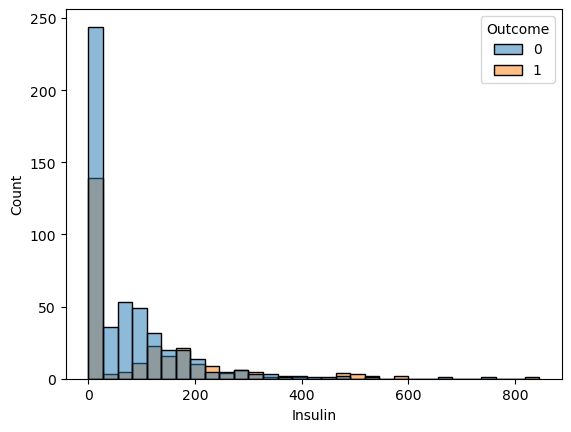

In [236]:
sns.histplot(x=data['Insulin'],hue=data['Outcome'])

# 3) Data Preprocessing

In [238]:
#1) Handling missing values and corrupt data.

In [240]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [242]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [244]:
# corrupt data
data.loc[data['Glucose']==0,'Glucose']=np.median(data['Glucose'])

In [ ]:
# .replace({old:new})

In [252]:
import warnings
warnings.filterwarnings('ignore')

In [254]:
# BloodPressure
data.BloodPressure.replace(0,np.median(data['BloodPressure']),inplace=True)

In [256]:
#Skinthickness,BMI,Insulin
data.SkinThickness.replace(0,np.median(data['SkinThickness']),inplace=True)
data.BMI.replace(0,np.median(data['BMI']),inplace=True)
data.Insulin.replace(0,np.median(data['Insulin']),inplace=True)

In [ ]:
data.describe()

In [ ]:
#2) convertion categorical to numerical = skip
#3) Handling Outliers

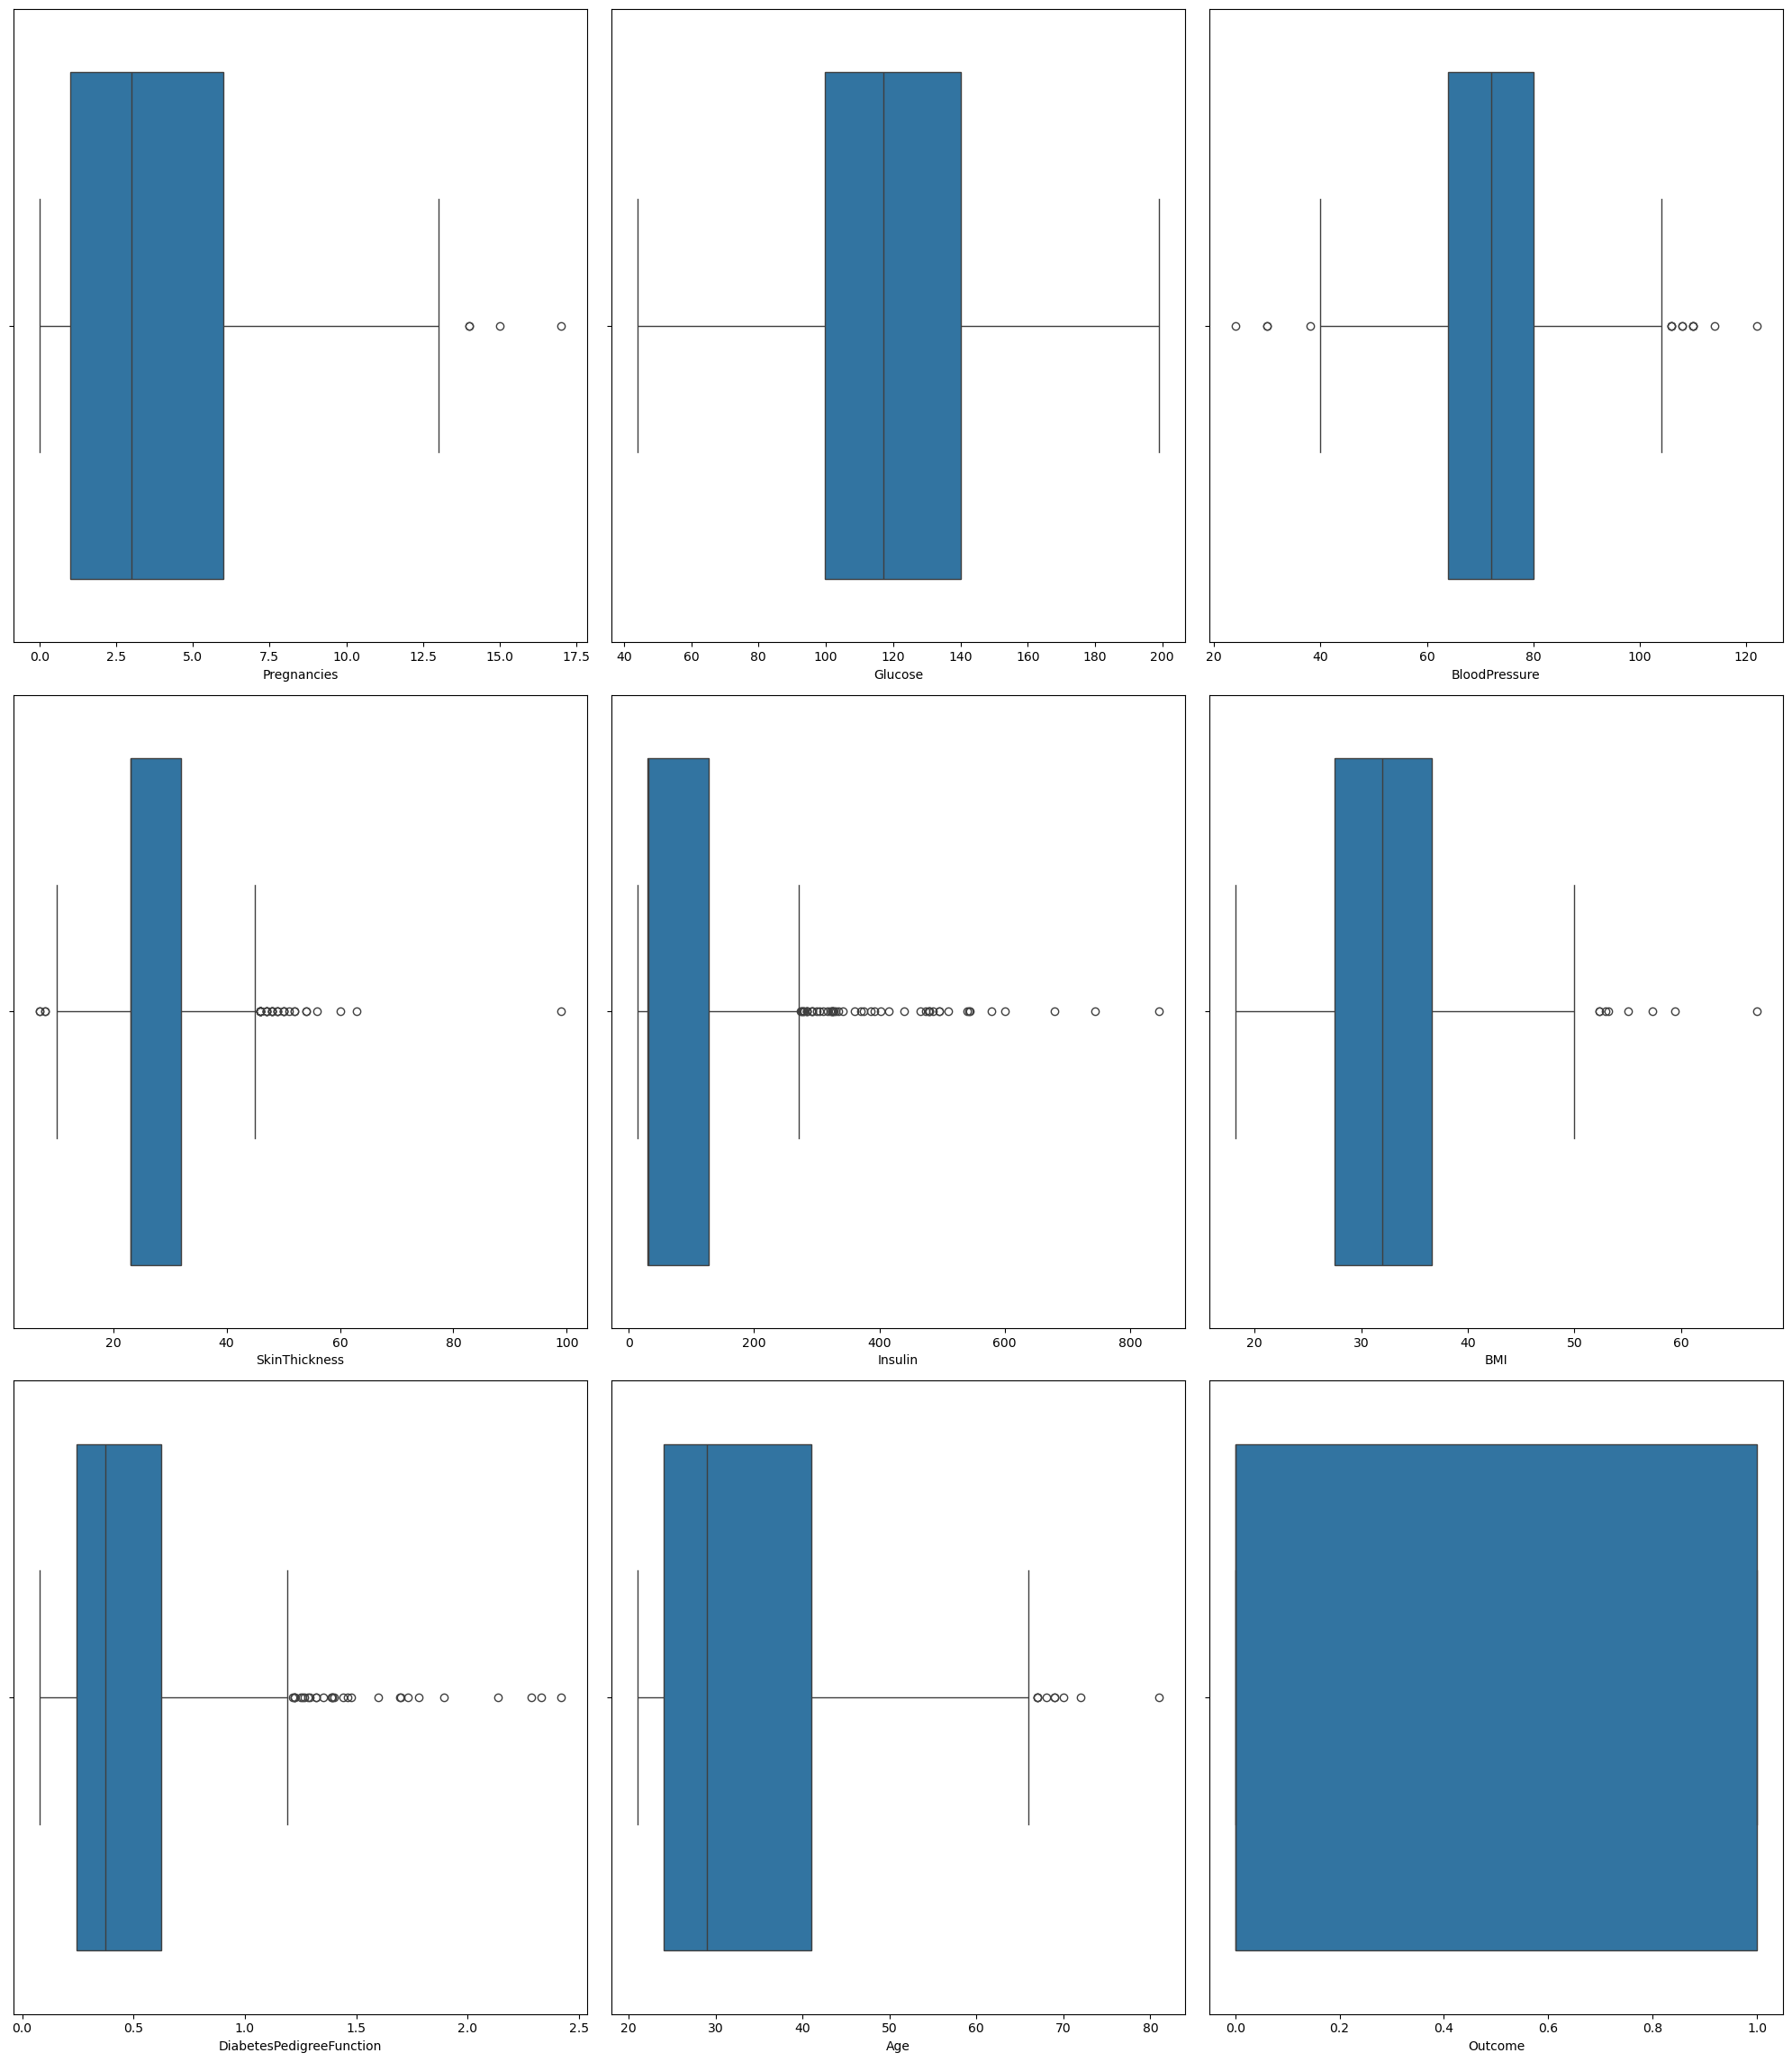

In [258]:
plt.figure(figsize=(20,23),facecolor='white')
plotnum=1
for i in data.columns:
    plt.subplot(3,3,plotnum)
    sns.boxplot(x=data[i])
    plotnum+=1
plt.tight_layout()

In [268]:
data.Pregnancies.value_counts()

Pregnancies
1     149
0     111
2     103
3      75
4      68
5      57
6      50
7      45
8      38
9      28
10     24
11     11
12      9
Name: count, dtype: int64

In [260]:
#Pregnancies
data.loc[data['Pregnancies']>12.5,'Pregnancies']=1

In [ ]:
sns.boxplot(x=data['Pregnancies'])

In [264]:
data.loc[data['BloodPressure']>110,'BloodPressure']=np.median(data['BloodPressure'])
data.loc[data['BloodPressure']<40,'BloodPressure']=np.median(data['BloodPressure'])

In [266]:
#SkinThickness
data.loc[data['SkinThickness']>57,'SkinThickness']=np.median(data['SkinThickness'])
data.loc[data['SkinThickness']<10,'SkinThickness']=np.median(data['SkinThickness'])

In [270]:
#insulin
data.loc[data['Insulin']>420,'Insulin']=np.median(data['Insulin'])

In [272]:
#BMI
data.loc[data['BMI']>50,'BMI']=np.median(data['BMI'])

In [274]:
#DiabetesPedigreeFunction
data.loc[data['DiabetesPedigreeFunction']>1.5,'DiabetesPedigreeFunction']=np.median(data['DiabetesPedigreeFunction'])

In [276]:
#Age
data.loc[data['Age']>70,'Age']=np.median(data['Age'])

## Scaling

In [278]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,30.5,33.6,0.6270,50,1
1,1,85,66,29,30.5,26.6,0.3510,31,0
2,8,183,64,23,30.5,23.3,0.6720,32,1
3,1,89,66,23,94.0,28.1,0.1670,21,0
4,0,137,40,35,168.0,43.1,0.3725,33,1


In [280]:
df1=data.drop('Outcome',axis=1)
df1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,30.5,33.6,0.6270,50
1,1,85,66,29,30.5,26.6,0.3510,31
2,8,183,64,23,30.5,23.3,0.6720,32
3,1,89,66,23,94.0,28.1,0.1670,21
4,0,137,40,35,168.0,43.1,0.3725,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180.0,32.9,0.1710,63
764,2,122,70,27,30.5,36.8,0.3400,27
765,5,121,72,23,112.0,26.2,0.2450,30
766,1,126,60,23,30.5,30.1,0.3490,47


In [282]:
# Apply Minmax Scaling
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
df2=sc.fit_transform(df1)

In [284]:
df2

array([[0.5       , 0.67096774, 0.45714286, ..., 0.48427673, 0.39270386,
        0.59183673],
       [0.08333333, 0.26451613, 0.37142857, ..., 0.26415094, 0.19527897,
        0.20408163],
       [0.66666667, 0.89677419, 0.34285714, ..., 0.16037736, 0.4248927 ,
        0.2244898 ],
       ...,
       [0.41666667, 0.49677419, 0.45714286, ..., 0.25157233, 0.11945637,
        0.18367347],
       [0.08333333, 0.52903226, 0.28571429, ..., 0.37421384, 0.19384835,
        0.53061224],
       [0.08333333, 0.31612903, 0.42857143, ..., 0.3836478 , 0.1695279 ,
        0.04081633]])

In [ ]:
df1.columns

In [286]:
# converting array into DataFrame
scaled_data=pd.DataFrame(df2,columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age'])

In [288]:
scaled_data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.500000,0.670968,0.457143,0.543478,0.041147,0.484277,0.392704,0.591837
1,0.083333,0.264516,0.371429,0.413043,0.041147,0.264151,0.195279,0.204082
2,0.666667,0.896774,0.342857,0.282609,0.041147,0.160377,0.424893,0.224490
3,0.083333,0.290323,0.371429,0.282609,0.199501,0.311321,0.063662,0.000000
4,0.000000,0.600000,0.000000,0.543478,0.384040,0.783019,0.210658,0.244898
...,...,...,...,...,...,...,...,...
763,0.833333,0.367742,0.514286,0.826087,0.413965,0.462264,0.066524,0.857143
764,0.166667,0.503226,0.428571,0.369565,0.041147,0.584906,0.187411,0.122449
765,0.416667,0.496774,0.457143,0.282609,0.244389,0.251572,0.119456,0.183673
766,0.083333,0.529032,0.285714,0.282609,0.041147,0.374214,0.193848,0.530612


In [290]:
final_df=pd.concat([data.Outcome,scaled_data],axis=1)

In [294]:
final_df.head()

,Outcome,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,1,0.500000,0.670968,0.457143,0.543478,0.041147,0.484277,0.392704,0.591837
1,0,0.083333,0.264516,0.371429,0.413043,0.041147,0.264151,0.195279,0.204082
2,1,0.666667,0.896774,0.342857,0.282609,0.041147,0.160377,0.424893,0.224490
3,0,0.083333,0.290323,0.371429,0.282609,0.199501,0.311321,0.063662,0.000000
4,1,0.000000,0.600000,0.000000,0.543478,0.384040,0.783019,0.210658,0.244898


In [ ]:
data.Outcome.value_counts()

# Feature Selection

<Axes: >

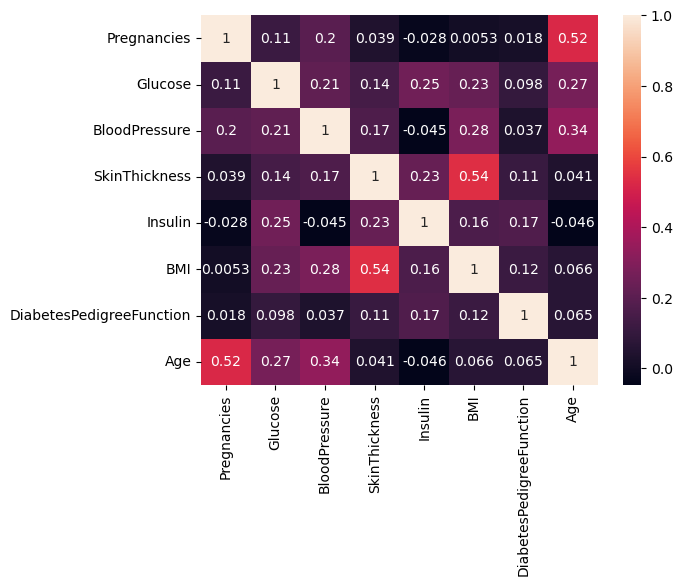

In [298]:
sns.heatmap(scaled_data.corr(),annot=True)

In [300]:
x=final_df.drop('Outcome',axis=1)
y=final_df.Outcome

In [302]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

# Model Creation

In [304]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()

In [306]:
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)

# Model Evaluation

In [312]:
from sklearn.metrics import confusion_matrix,recall_score,precision_score,accuracy_score,f1_score

In [314]:
y_test.shape

(192,)

In [316]:
confusion_matrix(y_test,y_pred)

array([[102,  21],
       [ 29,  40]], dtype=int64)

In [318]:
accuracy_score(y_test,y_pred)

0.7395833333333334

In [320]:
precision_score(y_test,y_pred)

0.6557377049180327

In [322]:
recall_score(y_test,y_pred)

0.5797101449275363

In [324]:
f1_score(y_test,y_pred)

0.6153846153846154

##  Classification Report

In [326]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.83      0.80       123
           1       0.66      0.58      0.62        69

    accuracy                           0.74       192
   macro avg       0.72      0.70      0.71       192
weighted avg       0.73      0.74      0.74       192



# Task : Multiclass Classification using One-vs-Rest method

In [ ]:
data2=sns.load_dataset('iris')

In [ ]:
data2

In [ ]:
data2.species.value_counts()

In [ ]:
x1=data2.drop('species',axis=1)
y1=data2.species

In [ ]:
x_train1,x_test1,y_train1,y_test1=train_test_split(x1,y1)

In [ ]:
#modelbuilding
from sklearn.linear_model import LogisticRegression
lm = LogisticRegression(multi_class='ovr')
lm.fit(x_train1, y_train1)

In [ ]:
y_pred1=lm.predict(x_test1)

In [ ]:
accuracy_score(y_test1,y_pred1)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test1,y_pred1))